<a href="https://colab.research.google.com/github/tinypenguin-Bang/Machine-Deep-Learning-HW/blob/main/2021251496_%EB%B0%A9%EC%A3%BC%ED%98%95_%EA%B3%BC%EC%A0%9C_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST, Fashion MNIST 데이터 분류 CNN 모델

*   Tensorflow 라이브러리 불러오기
*   Tensorflow 내의 MNIST 데이터셋 가져오기 (MNIST : 숫자 손글씨 데이터)


*   train / test set 저장


In [1]:
import tensorflow as tf                                   # Tensorflow 라이브러리
mnist = tf.keras.datasets.mnist                           # Tensorflow에 내장된 MNIST 데이터셋 가져오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # MNIST 데이터셋 기반 train / test 데이터셋 저장


11501568/11490434 [==============================] - 0s 0us/step


*   데이터 type 및 shape 확인

In [2]:
type(x_train)

numpy.ndarray

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

*   60000개의 train data와 10000개의 test data 확인
*   이미지 데이터당 (28,28) 배열 확인
*   60000개의 train data의 성능 확인을 위해 5000개를 validation set으로 변경 (검증 set)

In [7]:
# train set 에서 5000개를 validation set으로 변경
x_val, y_val = x_train[55000:,:], y_train[55000:]
x_train, y_train = x_train[:55000, :], y_train[:55000]

In [8]:
print(x_train.shape)  # 학습 set
print(x_val.shape)    # 검증 set

(55000, 28, 28)
(5000, 28, 28)


*   Numpy 라이브러리 불러오기
*   train / test set 데이터 표준화 (전처리)

In [9]:
# train / test set 데이터 표준화 (전처리)
import numpy as np
mean = np.mean(x_train, axis=0)  # 평균 (28 x 28 이미지)

In [10]:
mean.shape

(28, 28)

In [11]:
std = np.std(x_train)    # 표준편차

In [12]:
std

78.5901436214457

In [13]:
x_train_centered = (x_train-mean)/std     # 학습 데이터 표준화
x_val_centered = (x_val-mean)/std         # 검증 데이터 표준화
x_test_centered = (x_test-mean)/std       # 테스트 데이터 표준화

In [14]:
x_train_centered.shape

(55000, 28, 28)

*   One Hot Encoding (데이터를 단순한 숫자에서 수많은 0과 하나의 1이 있는 1차원 배열로 변경하는 것)
*   keras를 활용, to_categorical() 함수를 통해 One Hot Encoding으로 변경 가능

In [15]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

In [16]:
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


*   CNN 모델 만들기
*   keras 활용, layers와 models 도입하여 parameter 설정

In [17]:
# model 만들기

from tensorflow.keras import layers, models

model = models.Sequential()       # 모델 선언

In [18]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))   # 1st 2D Conv. layer

In [19]:
model.add(layers.MaxPool2D(2,2))                                        # 1st Pool. layer
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))  # 2nd 2D Conv. layer
model.add(layers.MaxPool2D(2,2))                                        # 2nd Pool. layer
model.add(layers.Flatten())                                             # Flatten layer

In [20]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))                        # Dense layer (Relu 함수 기반 DNN)
model.add(layers.Dropout(0.5))                                          # Dropout layer (Overfitting 방지)
model.add(layers.Dense(10, activation='softmax'))                       # Classification layer (softmax 함수 기반)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])       # loss function, optimizer, metrics 설정

In [23]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [24]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot))                            # training 진행, validation check 병행

Epoch 1/20
860/860 [==============================] - 77s 87ms/step - loss: 0.1299 - acc: 0.9607 - val_loss: 0.0440 - val_acc: 0.9872
Epoch 2/20
860/860 [==============================] - 69s 80ms/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 3/20
860/860 [==============================] - 67s 78ms/step - loss: 0.0338 - acc: 0.9893 - val_loss: 0.0330 - val_acc: 0.9914
Epoch 4/20
860/860 [==============================] - 68s 79ms/step - loss: 0.0282 - acc: 0.9911 - val_loss: 0.0378 - val_acc: 0.9906
Epoch 5/20
860/860 [==============================] - 68s 80ms/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.0343 - val_acc: 0.9916
Epoch 6/20
860/860 [==============================] - 69s 81ms/step - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0312 - val_acc: 0.9914
Epoch 7/20
860/860 [==============================] - 69s 81ms/step - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0446 - val_acc: 0.9914
Epoch 8/20
860/860 [==============================] - 68s 79ms

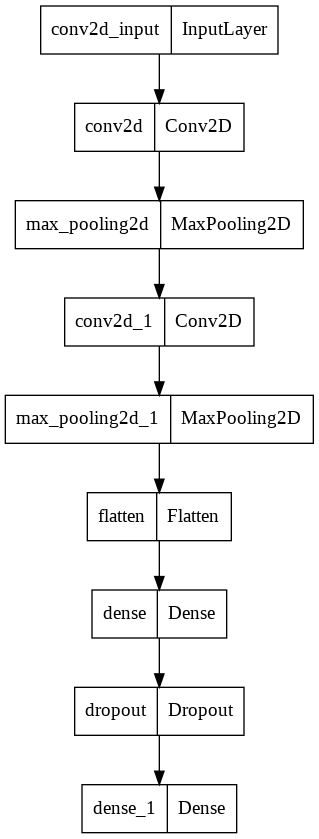

In [25]:
# plot_model함수를 활용하면 도식화된 모델 구성이 출력됨
tf.keras.utils.plot_model(model)

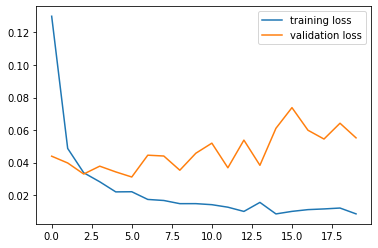

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

In [28]:
model.layers[0]

In [29]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
 array([[[[ 9.21415836e-02,  3.88750434e-03,  2.62568501e-04,
            2.78186612e-02, -7.60393813e-02,  1.15520023e-02,
           -4.97328080e-02,  1.00741930e-01,  4.89817513e-03,
            2.17960607e-02,  1.98328178e-02,  1.27690034e-02,
            1.21821716e-01, -4.63630743e-02, -7.32392520e-02,
            6.91135647e-03,  2.16338392e-02,  2.80917995e-02,
           -2.97309551e-02, -5.78103624e-02,  1.97746679e-02,
            5.21931387e-02, -7.35190287e-02, -4.80199233e-02,
            2.56852154e-02,  2.48902086e-02,  1.12905748e-01,
           -1.61198061e-02,  1.71266533e-02,  6.24152608e-02,
            3.11471317e-02,  4.26892787e-02]],
 
         [[ 1.54102249e-02, -3.74729112e-02, -1.28290892e-01,
            1.89392902e-02, -1.22162141e-01,  9.81108323e-02,
           -3.57318334e-02,  1.37674771e-02,  8.97711590e-02,
            4.13433276e-02,  6.43942952e-02, -2.41196919e-02,
         

In [30]:
model.layers[0].weights[0].shape

TensorShape([5, 5, 1, 32])

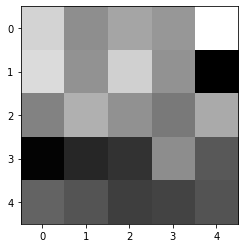

In [31]:
import matplotlib.pyplot as plt

plt.imshow(model.layers[0].weights[0][:,:,0,0], cmap='gray')

In [32]:
# conv2d 확인

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)

In [33]:
conv2d_out = conv2d_1.predict(x_train_c[[0]])

In [34]:
x_train_c.shape

(55000, 28, 28, 1)

In [35]:
conv2d_out.shape

(1, 24, 24, 32)

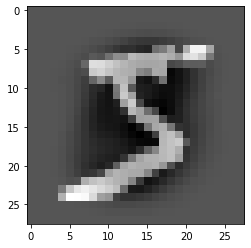

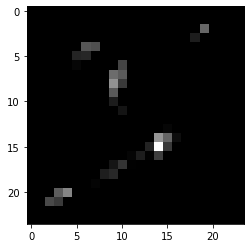

In [36]:
import matplotlib.pyplot as plt

plt.imshow(x_train_c[0,:,:,0], cmap='gray')  # 원본
plt.figure()
plt.imshow(conv2d_out[0,:,:,1],cmap='gray')  # convolution

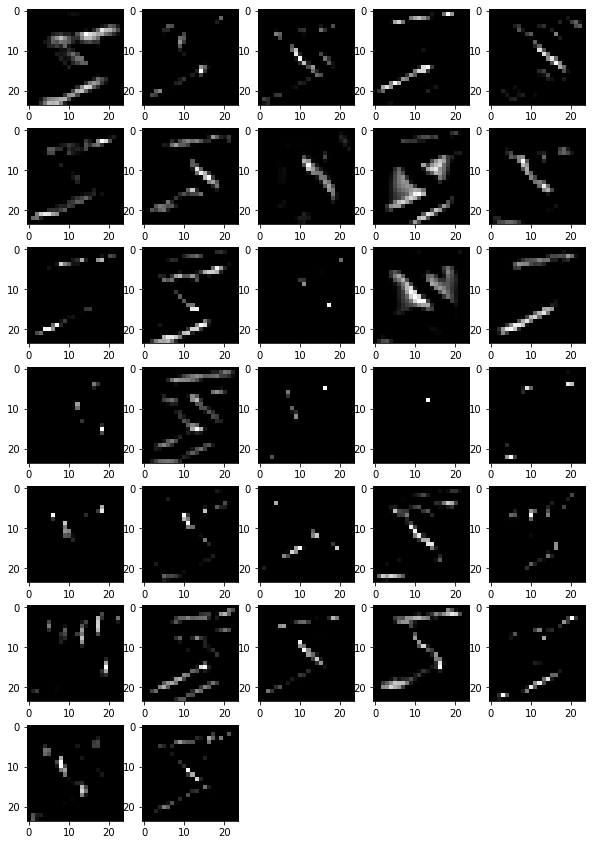

In [37]:
# 32개 필터 적용된 것 확인
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

In [38]:
maxpool_1 = models.Model(inputs=model.input, outputs=model.layers[1].output)

In [39]:
maxpool_out = maxpool_1.predict(x_train_c[[0]])

In [40]:
maxpool_out.shape

(1, 12, 12, 32)

In [41]:
maxpool_out.max()

1.6402036

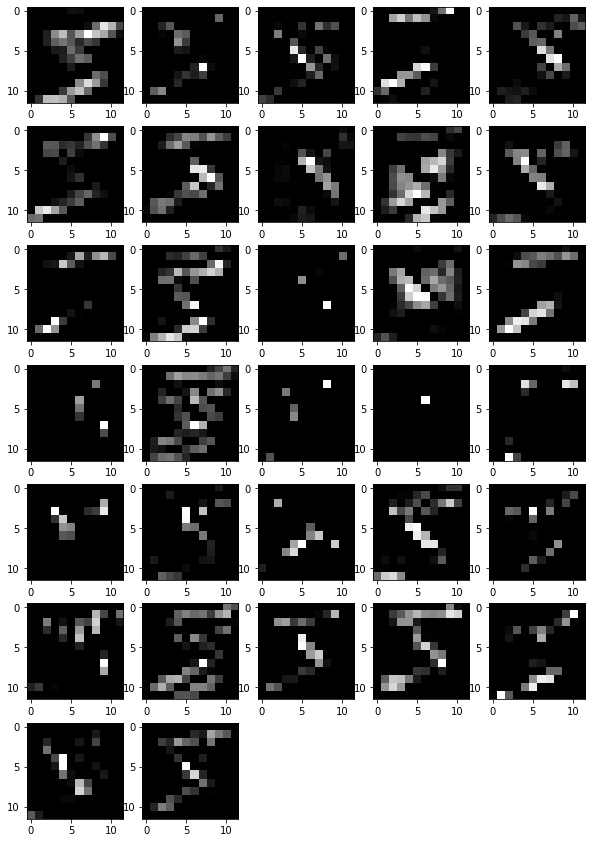

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')

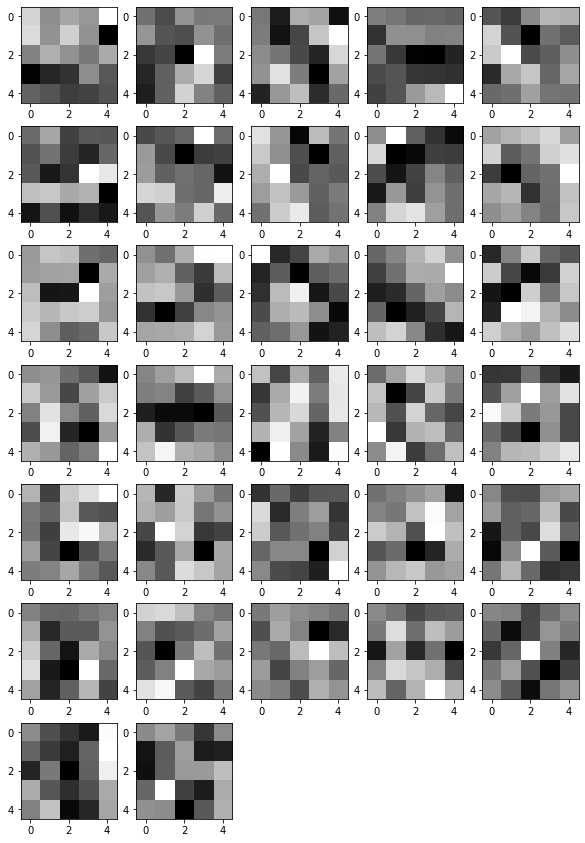

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(model.layers[0].kernel[:,:,0,i], cmap='gray')
plt.show()

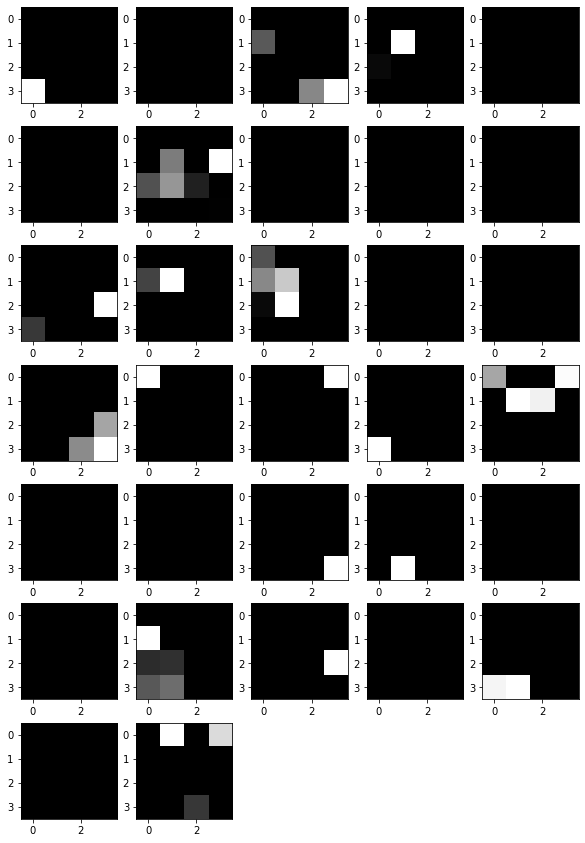

In [44]:
maxpool_3 = models.Model(inputs=model.input, outputs=model.layers[3].output)
maxpool_out = maxpool_3.predict(x_train_c[[0]])
fig = plt.figure(figsize=(10,15))
for i in range(32):
  fig.add_subplot(7,5,i+1)
  plt.imshow(maxpool_out[0,:,:,i], cmap='gray')
plt.show()

In [45]:
flat = models.Model(inputs=model.input, outputs=model.layers[4].output)
flat_out = flat.predict(x_train_c[[0]])

In [46]:
flat_out

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
import pandas as pd
flat_df = pd.Series(flat_out[0])

In [48]:
flat_df.describe()

count    1024.000000
mean        0.078980
std         0.329182
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.416236
dtype: float64

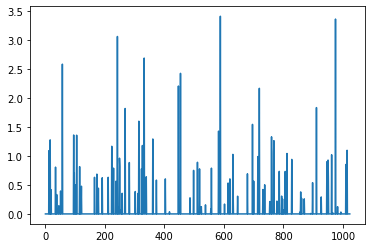

In [49]:
flat_df.plot()

# Fashion MNIST

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [51]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [52]:
test_images.shape

(10000, 28, 28)

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

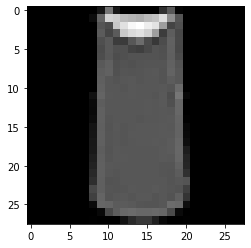

In [55]:
plt.figure()
plt.imshow(train_images[2], cmap='gray')

In [56]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [57]:
label_df = pd.Series(train_labels)
label_df.value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [58]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

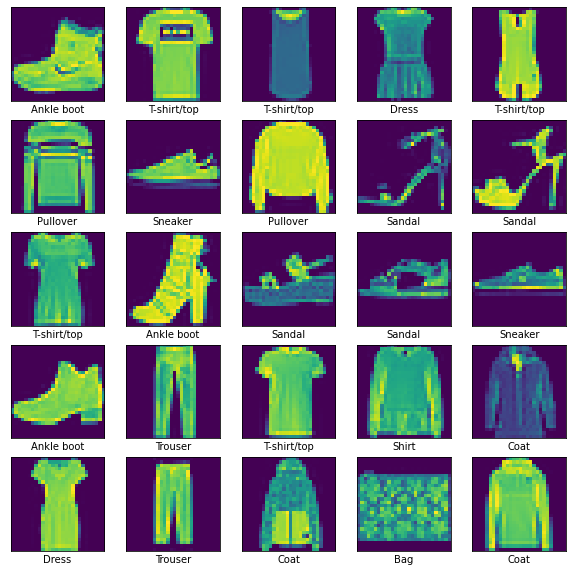

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4970 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2928 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2786 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2458 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [62]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3302 - accuracy: 0.8837 - 489ms/epoch - 2ms/step


In [63]:
predictions = model.predict(test_images)

In [64]:
predictions.shape

(10000, 10)

In [65]:
predictions[0]

array([1.25374315e-08, 6.44586121e-11, 1.24521082e-09, 1.74264639e-12,
       1.08869092e-09, 1.43621801e-04, 9.71597114e-09, 6.27945119e-04,
       5.35256461e-09, 9.99228358e-01], dtype=float32)

In [66]:
predictions[0].max()

0.99922836

In [67]:
np.argmax(predictions[0])

9

In [68]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

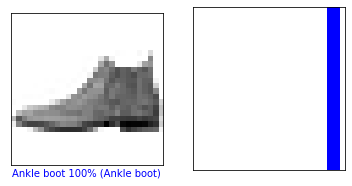

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

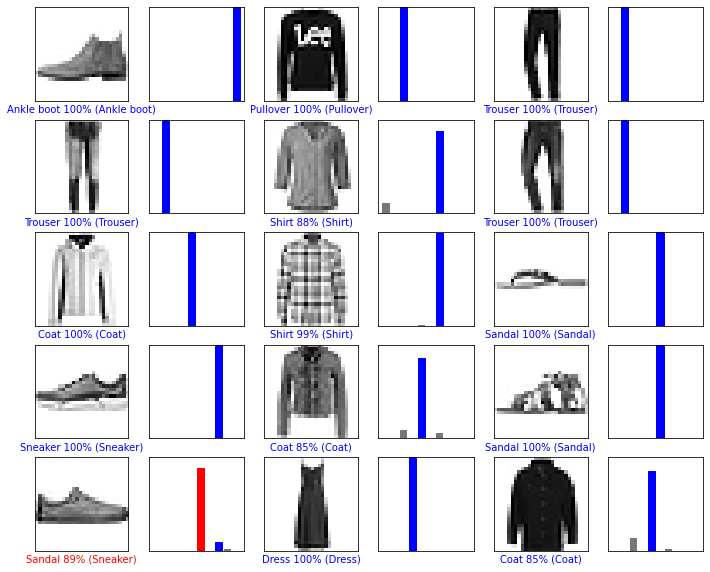

In [70]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [75]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[12]

print(img.shape)

(28, 28)


In [76]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [77]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2732423e-09 1.4572390e-06 1.3185820e-09 6.6746732e-05 6.2892866e-08
  8.8635969e-01 3.4642031e-08 8.9298949e-02 2.4273021e-02 4.9222613e-09]]


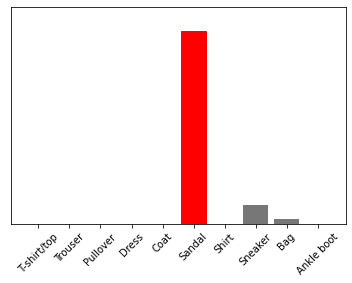

In [78]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)